<a href="https://colab.research.google.com/github/sriramthota1/statml/blob/main/finalstatml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('/content/dataset changed.csv')
print(data)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

In [ ]:
x=data.iloc[:,0:13]
y=data.iloc[:,13:14]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit(x)
dd=sc.transform(x)
print(data)
print(dd)
print(x)
print(y)
     

StandardScaler()
[[-0.83537431 -0.79131661  1.14170354 ...  1.32162751  1.57902607
   1.07312049]
 [ 1.47829663 -0.12670487 -0.80311147 ...  0.13542358  0.93625569
  -0.58748692]
 [ 1.35709296  1.31213982 -0.80349871 ...  1.14659573 -1.51380226
  -0.33209522]
 ...
 [-1.05234609 -0.87804866  1.28587062 ... -1.37001304 -1.38205402
  -1.28776845]
 [ 1.59768553 -0.45784646 -0.90902909 ...  1.32772953  1.06982944
   0.59749702]
 [ 0.4669346   0.55855544 -0.32829064 ... -0.53325125  1.52285961
   0.79996367]]
          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ..

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500, 1)
(2500, 13)
(2500, 1)


In [ ]:
lg=LogisticRegression(random_state=99)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=True)
mm=lg.fit(x_train, y_train)
print('training value',mm.score(x_train,y_train))
print('testing value',mm.score(x_test,y_test))
yp=mm.predict(x_test)  
from sklearn.metrics import accuracy_score
print(accuracy_score(yp,y_test))

training value 0.9027777777777778
testing value 0.886
0.886


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yp,y_test))
     

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       671
           1       0.82      0.84      0.83       329

    accuracy                           0.89      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.89      0.89      0.89      1000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


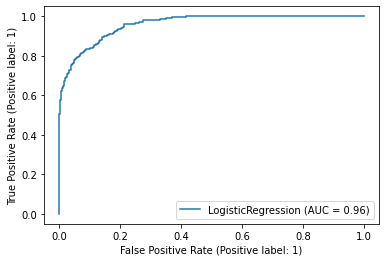

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(mm,x_test,y_test)

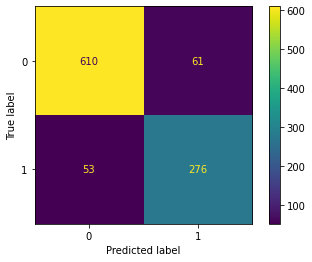

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(yp,y_test)
d=ConfusionMatrixDisplay(cm).plot()
     

[[ 2.95906002e+00  3.07988520e+00  8.38102539e+00 ...  8.87444921e-01
   9.58033988e-01  5.53474890e-02]
 [ 9.30409724e+00  4.90252411e+00  3.04754073e+00 ...  5.62139051e-01
   7.81759911e-01 -5.95746400e-03]
 [ 8.97170691e+00  8.84842842e+00  3.04647875e+00 ...  8.39444015e-01
   1.09853245e-01  3.47087900e-03]
 ...
 [ 2.36403419e+00  2.84203025e+00  8.77639096e+00 ...  1.49286458e-01
   1.45984032e-01 -3.18098880e-02]
 [ 9.63151069e+00  3.99439760e+00  2.75707093e+00 ...  8.89118346e-01
   8.18391326e-01  3.77888090e-02]
 [ 6.53052662e+00  6.78178990e+00  4.34969522e+00 ...  3.78760930e-01
   9.42630833e-01  4.52633080e-02]]
Confusion Matrix:
[[595  28]
 [ 38 339]]


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       623
           1       0.92      0.90      0.91       377

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

Accuracy: 0.934


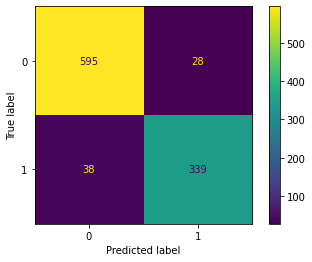

In [ ]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('/content/dataset changed.csv')  
  
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, 0:13].values  
y= data_set.iloc[:, 13:14].values   
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
  
# Splitting the dataset into training and test set.  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
result = confusion_matrix(y_test, y_pred)
d=ConfusionMatrixDisplay(result).plot()
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  
y_train = st_x.fit_transform(y_train)
y_test = st_x.transform(y_test)